In [1]:
# importing useful packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# making df of zillow housing data
df = pd.read_csv("Data/zillow_index.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22467 entries, 0 to 22466
Columns: 281 entries, RegionID to 2022-09-30
dtypes: float64(273), int64(2), object(6)
memory usage: 48.2+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
5,40326,5,Phoenix,city,AZ,AZ,"Phoenix-Mesa-Chandler, AZ",Maricopa County,121786.0,122161.0,...,386475.0,391408.0,398975.0,406917.0,416954.0,424696.0,430372.0,428097.0,422019.0,413234.0
6,13271,6,Philadelphia,city,PA,PA,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Philadelphia County,74705.0,74913.0,...,229457.0,229893.0,230282.0,230871.0,231866.0,233744.0,235810.0,237364.0,238641.0,239856.0
7,18959,7,Las Vegas,city,NV,NV,"Las Vegas-Henderson-Paradise, NV",Clark County,163456.0,163436.0,...,386716.0,396287.0,406330.0,417940.0,426638.0,434909.0,440268.0,441936.0,439130.0,433373.0
8,54296,8,San Diego,city,CA,CA,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,224292.0,225685.0,...,870773.0,892731.0,915085.0,940519.0,961875.0,976489.0,977085.0,966561.0,956608.0,950455.0
9,38128,9,Dallas,city,TX,TX,"Dallas-Fort Worth-Arlington, TX",Dallas County,119344.0,119508.0,...,291386.0,295947.0,302528.0,309201.0,317293.0,323657.0,329811.0,332004.0,332920.0,328711.0


In [3]:
# This is a large df. We will frame a df by the four largest cities
df4 = df.loc[0:3].copy()
df4.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
# Now we need to melt to longform data
dfm = pd.melt(df4.drop(columns=['SizeRank','RegionType','StateName','RegionID']),
              id_vars=['RegionName','State','Metro','CountyName'],
              value_name='Confirmed',var_name="Date")
dfm.head()

,RegionName,State,Metro,CountyName,Date,Confirmed
0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0


In [5]:
# Fortunately the melted dates are already datetime format. 
dfm['Date'] = pd.to_datetime(dfm['Date'])
dfm.head(3)

,RegionName,State,Metro,CountyName,Date,Confirmed
0,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0


In [6]:
# Making 'Date' index
dfm = dfm.set_index("Date")
dfm.head()

,RegionName,State,Metro,CountyName,Confirmed
Date,,,,,
2000-01-31,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,Chicago,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [9]:
#Resampling the dataframe as monthly frequency, grouped by City
res = dfm.groupby('RegionName').resample("MS").sum()
res

C:\Users\Rovidicus\AppData\Local\Temp\ipykernel_15596\2413772243.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res = dfm.groupby('RegionName').resample("MS").sum()


Confirmed
RegionName Date                 
Chicago    2000-01-01   166139.0
           2000-02-01   166536.0
           2000-03-01   167368.0
           2000-04-01   168826.0
           2000-05-01   170499.0
...                          ...
New York   2022-05-01   768797.0
           2022-06-01   773944.0
           2022-07-01   777692.0
           2022-08-01   779960.0
           2022-09-01   781622.0

[1092 rows x 1 columns]

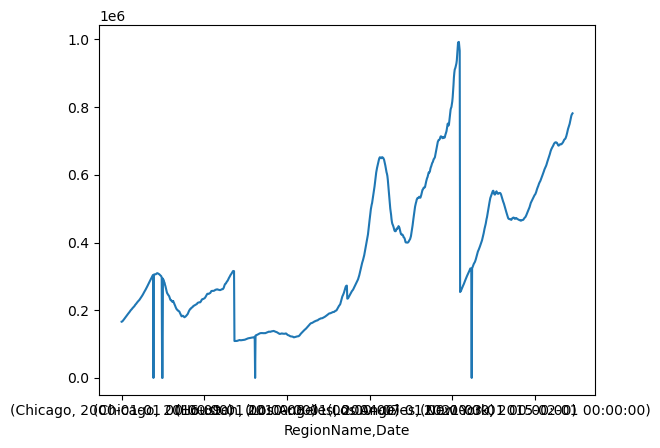

In [11]:
# Trying to plot
ax = res['Confirmed'].plot()

In [17]:
# Disgusting. I will unstack
unstacked = res.unstack(level=0)
unstacked 

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-01  166139.0  109068.0    234181.0  253690.0
2000-02-01  166536.0  109079.0    234401.0  255517.0
2000-03-01  167368.0  108878.0    235513.0  257207.0
2000-04-01  168826.0  108881.0    237589.0  260310.0
2000-05-01  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-01  312487.0  265558.0    990391.0  768797.0
2022-06-01  314663.0  268901.0    992337.0  773944.0
2022-07-01  315910.0  271059.0    992630.0  777692.0
2022-08-01  315587.0  272400.0    978196.0  779960.0
2022-09-01  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [23]:
def thousands(x,pos):
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Creating formatter
fmt_thous = mticks.FuncFormatter(thousands)

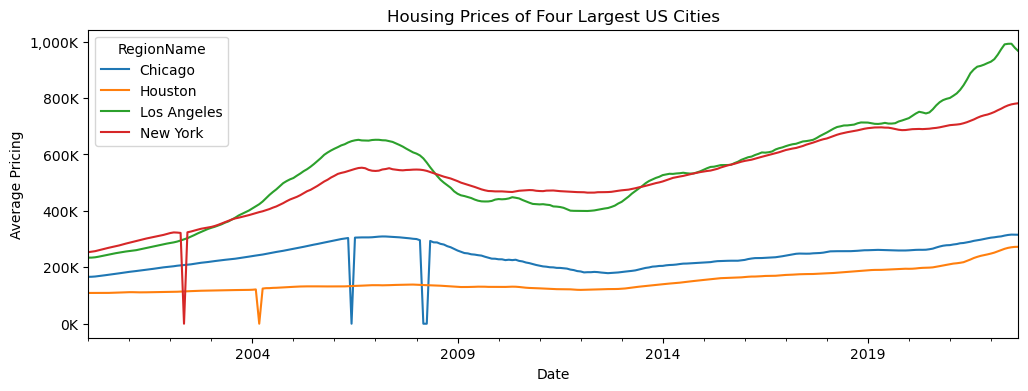

In [24]:
# Now plotting again
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
ax = unstacked['Confirmed'].plot()
ax.set(title="Housing Prices of Four Largest US Cities", xlabel="Date", ylabel="Average Pricing")
ax.yaxis.set_major_formatter(fmt_thous);

1. Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [38]:
# Slicing December to view averages
unstacked.loc['2008-12']

Confirmed                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2008-12-01  265306.0  131283.0    469294.0  510309.0

### New York is highest at 510309 with Houston lowest at 131283

2. How much did the home values change from November 2008 to December 2008 (in dollars)?

In [39]:
change = unstacked.loc['2008-11':'2008-12']
change_diff = change.diff()
change_diff

Confirmed                             
RegionName   Chicago Houston Los Angeles New York
Date                                             
2008-11-01       NaN     NaN         NaN      NaN
2008-12-01   -5753.0  -964.0    -12611.0  -4458.0